In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("credit_risk_dataset.csv")

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
df.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [ ]:
df.shape


(32581, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
#finding missing value
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,887
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3095
loan_status,0
loan_percent_income,0


In [ ]:
df.isnull().sum()/df.shape[0]*100

,0
person_age,0.000000
person_income,0.000000
person_home_ownership,0.000000
person_emp_length,2.736303
loan_intent,0.000000
loan_grade,0.000000
loan_amnt,0.000000
loan_int_rate,9.547754
loan_status,0.000000
loan_percent_income,0.000000


In [ ]:
#finding duplicates
df.duplicated().sum()

np.int64(165)

In [ ]:
#drop duplicates
df = df.drop_duplicates()


In [ ]:
#finding duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
#identifiying garbage values
for i in df.select_dtypes(include='object').columns:
    print(df[i].value_counts())
    print("***"*10)

person_home_ownership
RENT        16378
MORTGAGE    13369
OWN          2563
OTHER         106
Name: count, dtype: int64
******************************
loan_intent
EDUCATION            6411
MEDICAL              6042
VENTURE              5682
PERSONAL             5498
DEBTCONSOLIDATION    5189
HOMEIMPROVEMENT      3594
Name: count, dtype: int64
******************************
loan_grade
A    10703
B    10387
C     6438
D     3620
E      963
F      241
G       64
Name: count, dtype: int64
******************************
cb_person_default_on_file
N    26686
Y     5730
Name: count, dtype: int64
******************************


#Exploratory Data Analysis(EDA)

In [ ]:
#descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32416.0,27.747008,6.354100,20.00,23.00,26.00,30.00,144.00
person_income,32416.0,66091.640826,62015.580269,4000.00,38542.00,55000.00,79218.00,6000000.00
person_emp_length,31529.0,4.790510,4.145490,0.00,2.00,4.00,7.00,123.00
loan_amnt,32416.0,9593.845632,6322.730241,500.00,5000.00,8000.00,12250.00,35000.00
loan_int_rate,29321.0,11.017265,3.241680,5.42,7.90,10.99,13.47,23.22
loan_status,32416.0,0.218688,0.413363,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32416.0,0.170250,0.106812,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32416.0,5.811297,4.059030,2.00,3.00,4.00,8.00,30.00


In [ ]:
df.describe(include="object")

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32416,32416,32416,32416
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16378,6411,10703,26686


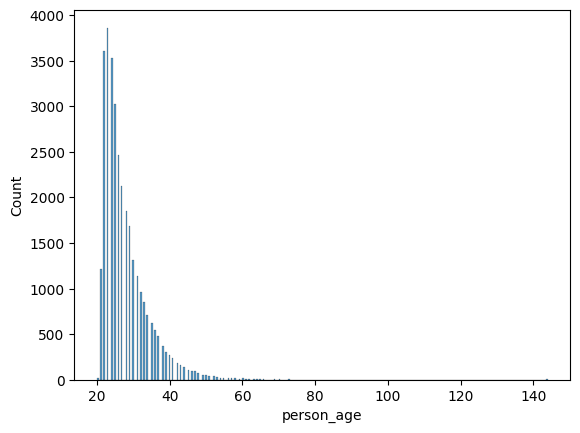

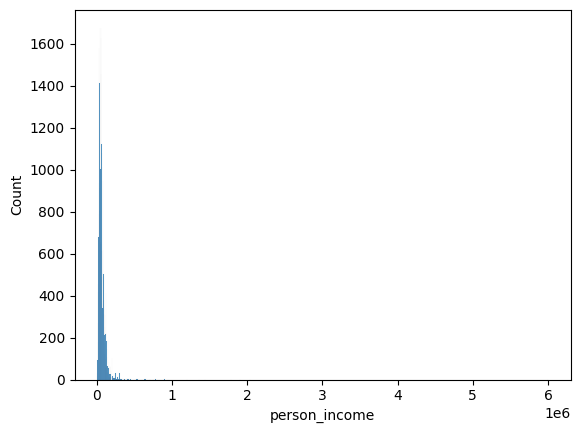

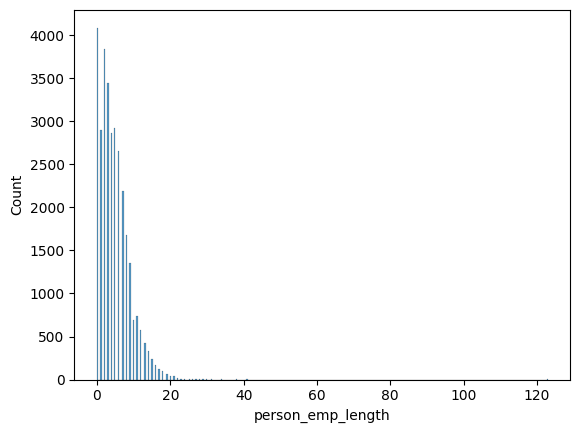

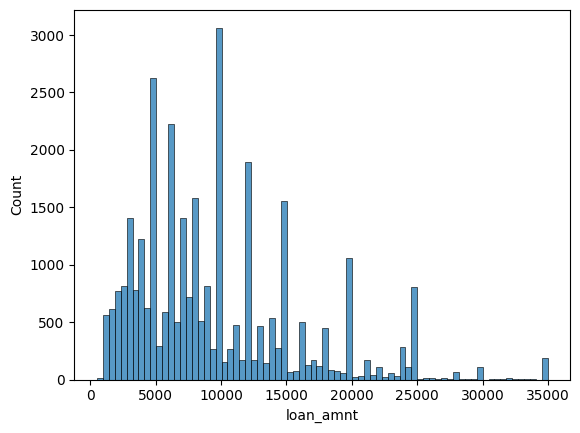

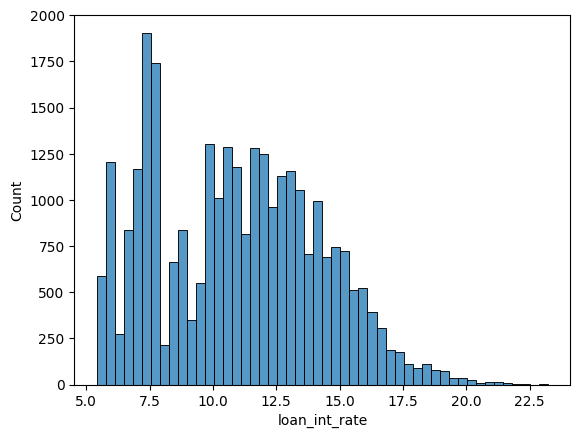

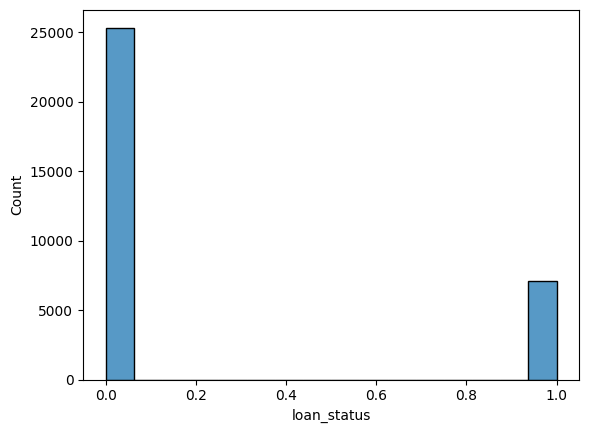

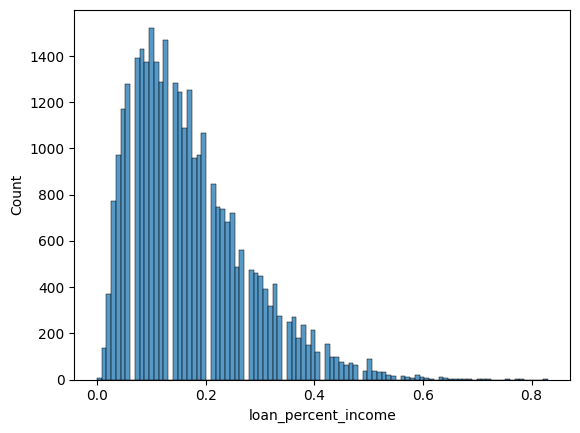

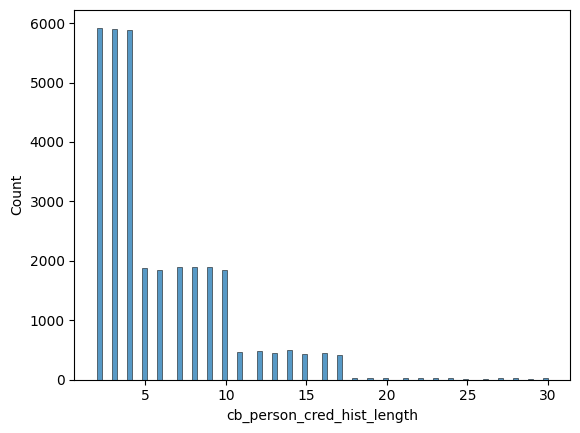

In [ ]:
#histogram to understand the distribution
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df,x=i)
  plt.show()


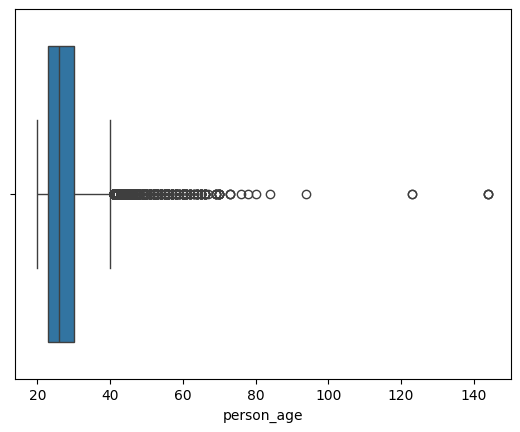

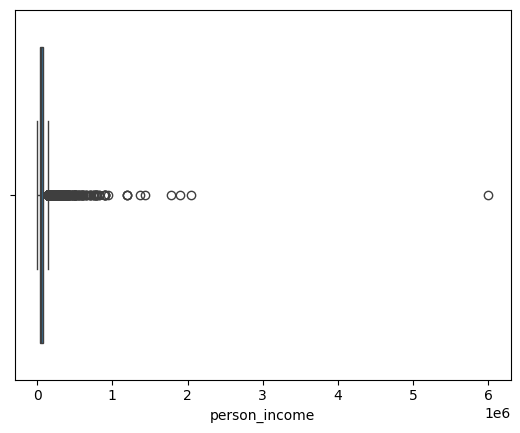

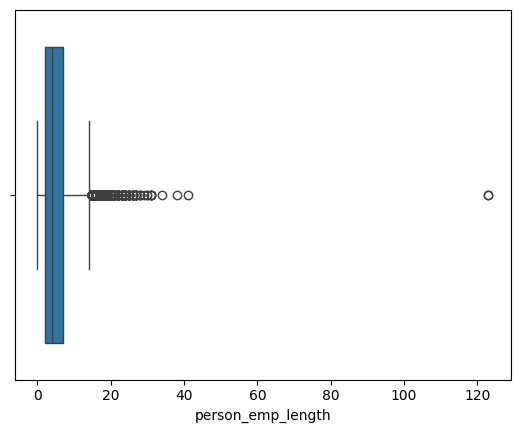

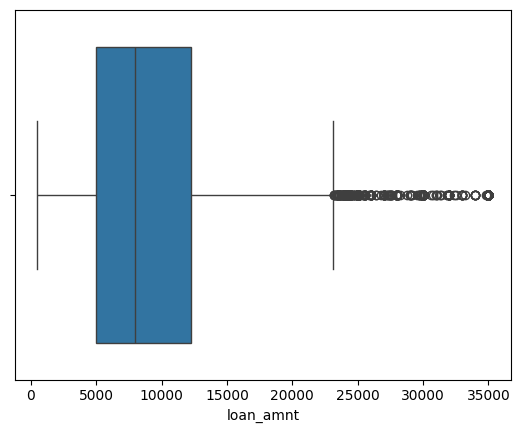

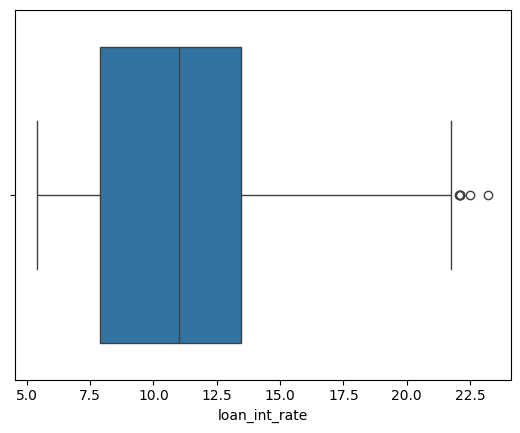

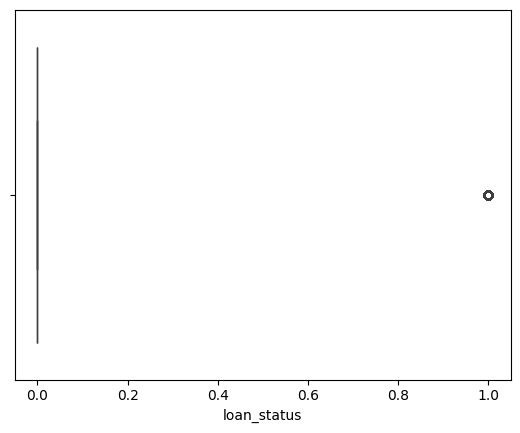

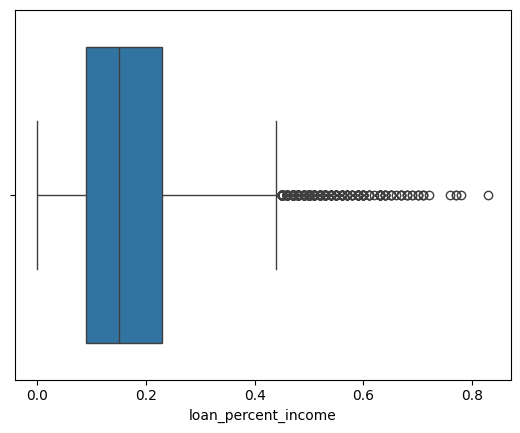

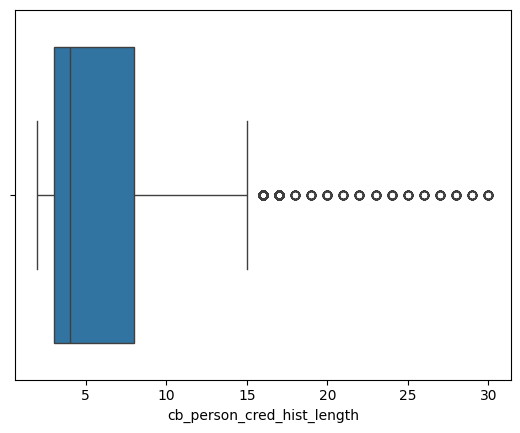

In [ ]:
#Boxlop-to-identify outliers
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df,x=i)
  plt.show()


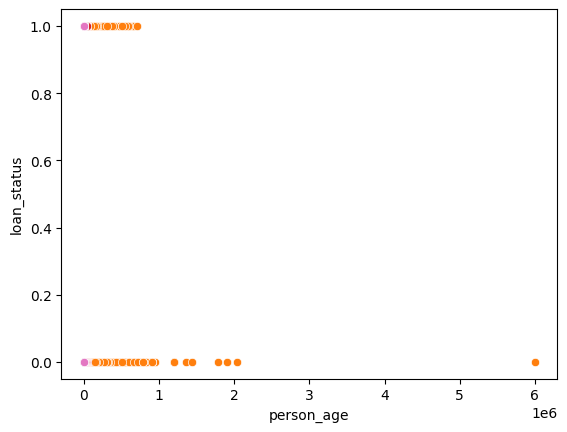

In [ ]:
#scatter plot to  understnd the relationship
for i in ['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length']:
       sns.scatterplot(data=df,x=i,y="loan_status")
       plt.show

In [ ]:
df.select_dtypes(include="number").columns


Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')

In [ ]:
#correlation
s=df.select_dtypes(include="number").corr()

<Axes: >

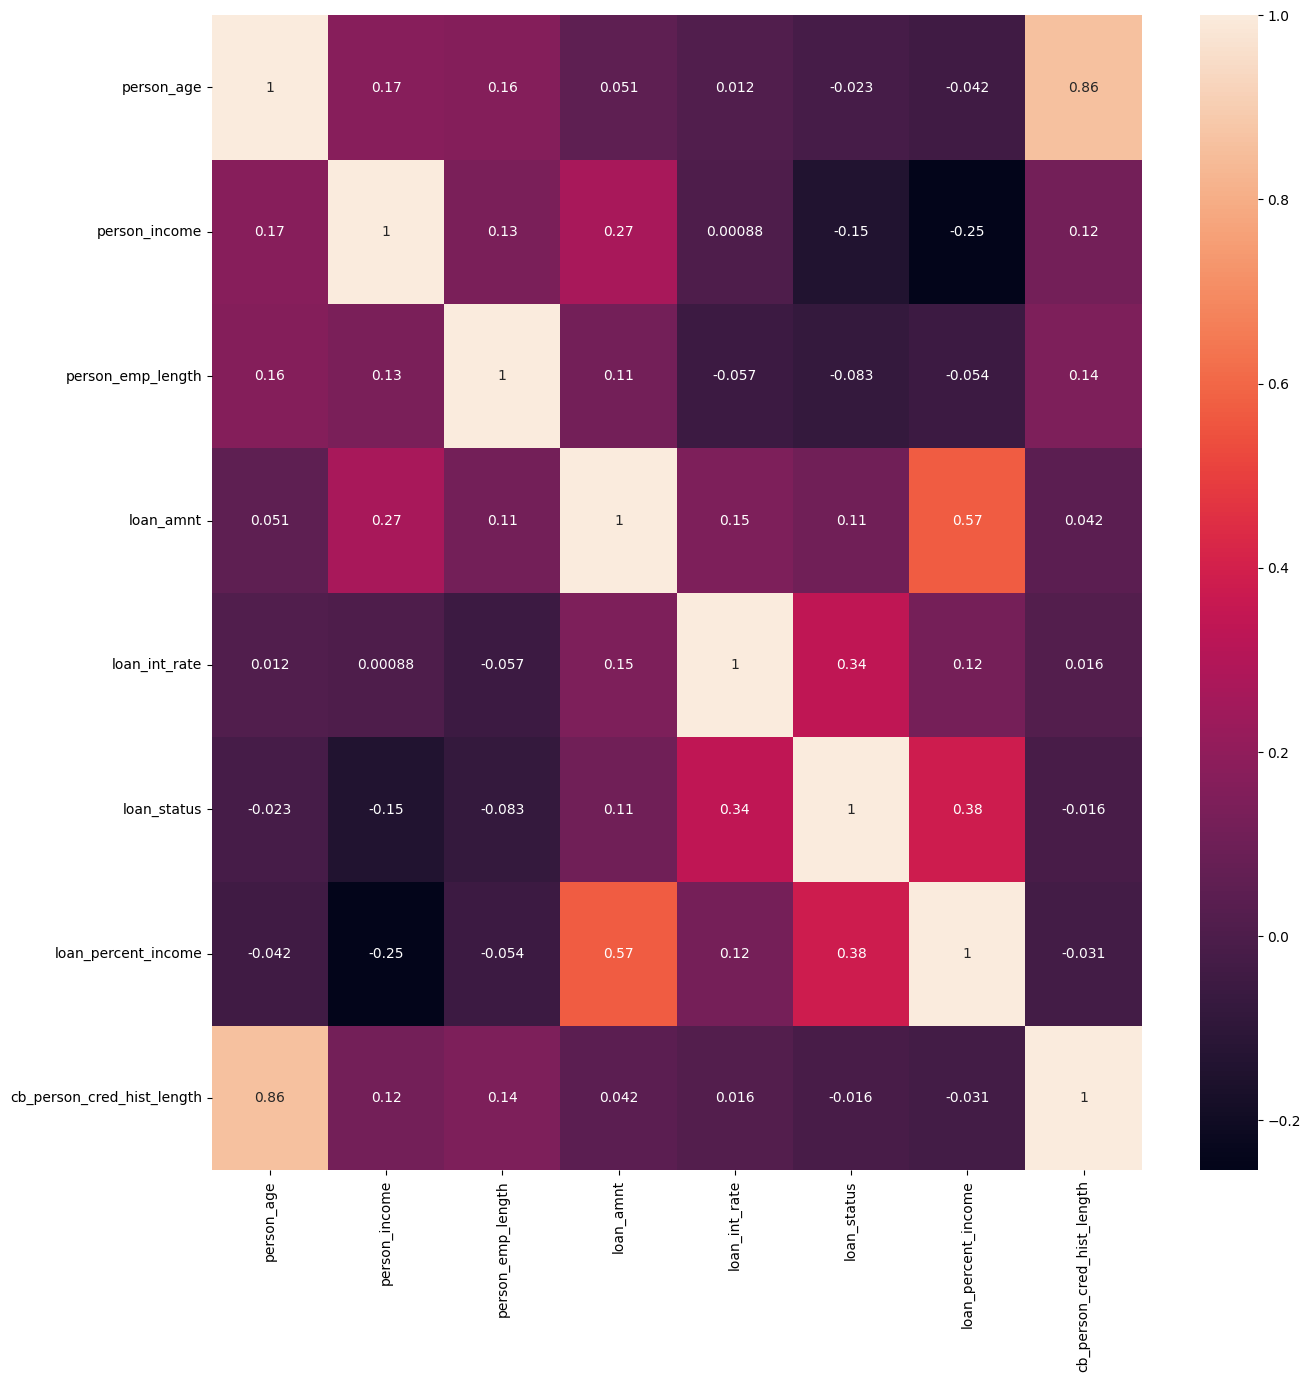

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(s,annot=True)

#missing value treatments

In [ ]:
#choose the method of imputing missing values
#like mean,median,mode or KNNIputer

In [ ]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


In [ ]:
from sklearn.impute import KNNImputer
impute=KNNImputer()

In [ ]:
for i in df.select_dtypes(include="number").columns:
  df[i]=impute.fit_transform(df[[i]] )

#Outliers treatment

In [ ]:
#decide whether to do outliers tratment or not


In [ ]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22.0,59000.0,RENT,123.0,PERSONAL,D,35000.0,16.02,1.0,0.59,Y,3.0
1,21.0,9600.0,OWN,5.0,EDUCATION,B,1000.0,11.14,0.0,0.10,N,2.0
2,25.0,9600.0,MORTGAGE,1.0,MEDICAL,C,5500.0,12.87,1.0,0.57,N,3.0
3,23.0,65500.0,RENT,4.0,MEDICAL,C,35000.0,15.23,1.0,0.53,N,2.0
4,24.0,54400.0,RENT,8.0,MEDICAL,C,35000.0,14.27,1.0,0.55,Y,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57.0,53000.0,MORTGAGE,1.0,PERSONAL,C,5800.0,13.16,0.0,0.11,N,30.0
32577,54.0,120000.0,MORTGAGE,4.0,PERSONAL,A,17625.0,7.49,0.0,0.15,N,19.0
32578,65.0,76000.0,RENT,3.0,HOMEIMPROVEMENT,B,35000.0,10.99,1.0,0.46,N,28.0
32579,56.0,150000.0,MORTGAGE,5.0,PERSONAL,B,15000.0,11.48,0.0,0.10,N,26.0


#Encoding of data

In [ ]:
df = pd.get_dummies(df, columns=[
    'person_home_ownership',
    'loan_intent',
    'loan_grade'
], drop_first=True)


In [ ]:
df['loan_status'] = df['loan_status'].map({'Y':1, 'N':0})
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map({'Y':1, 'N':0})


In [ ]:
df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_OTHER,...,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,22.0,59000.0,123.0,35000.0,16.02,1.0,0.59,Y,3.0,False,...,False,False,True,False,False,False,True,False,False,False
1,21.0,9600.0,5.0,1000.0,11.14,0.0,0.10,N,2.0,False,...,False,False,False,False,True,False,False,False,False,False
2,25.0,9600.0,1.0,5500.0,12.87,1.0,0.57,N,3.0,False,...,False,True,False,False,False,True,False,False,False,False
3,23.0,65500.0,4.0,35000.0,15.23,1.0,0.53,N,2.0,False,...,False,True,False,False,False,True,False,False,False,False
4,24.0,54400.0,8.0,35000.0,14.27,1.0,0.55,Y,4.0,False,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57.0,53000.0,1.0,5800.0,13.16,0.0,0.11,N,30.0,False,...,False,False,True,False,False,True,False,False,False,False
32577,54.0,120000.0,4.0,17625.0,7.49,0.0,0.15,N,19.0,False,...,False,False,True,False,False,False,False,False,False,False
32578,65.0,76000.0,3.0,35000.0,10.99,1.0,0.46,N,28.0,False,...,True,False,False,False,True,False,False,False,False,False
32579,56.0,150000.0,5.0,15000.0,11.48,0.0,0.10,N,26.0,False,...,False,False,True,False,True,False,False,False,False,False


In [ ]:
df.to_csv("credit_risk_processed.csv", index=False)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful